In [1]:
# Import the needed Libraries 
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Getting the data frame
df =  web.DataReader('TCS.BO', data_source='yahoo', start='2012-01-01', end='2022-02-19')

# Showing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,593.000000,576.299988,577.575012,589.125000,301766.0,485.098175
2012-01-03,604.900024,590.500000,591.150024,598.349976,509242.0,492.694214
2012-01-04,602.000000,585.575012,601.000000,587.200012,205780.0,483.513062
2012-01-05,592.500000,583.599976,586.000000,586.224976,203192.0,482.710205
2012-01-06,593.974976,578.599976,580.525024,585.474976,206840.0,482.092773
...,...,...,...,...,...,...
2022-02-14,3794.149902,3710.000000,3734.000000,3734.250000,411550.0,3734.250000
2022-02-15,3833.000000,3749.949951,3785.449951,3817.699951,280664.0,3817.699951
2022-02-16,3856.000000,3805.899902,3852.000000,3813.550049,171784.0,3813.550049


In [3]:
# Getting the number of Rows and Columns in our data set
df.shape

(2499, 6)

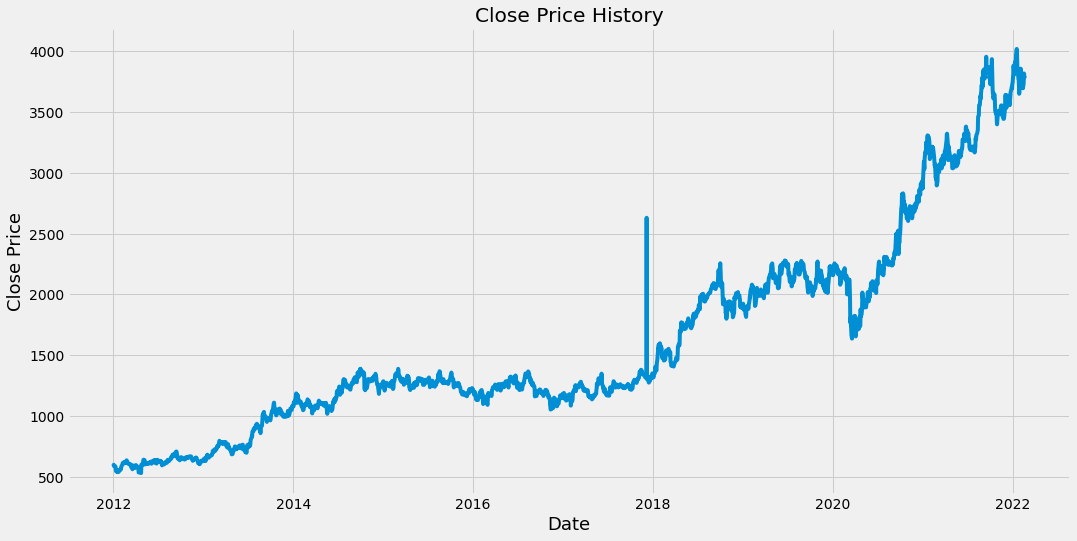

In [4]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close' ])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [5]:
# Create a Data frame with only 'Close' Column
data = df.filter(['Close'])

# Convert the data frame into a numpy array
dataset = data.values

# Get the number of rows to train our model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2000

In [6]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01705128],
       [0.01969493],
       [0.01649962],
       ...,
       [0.94109428],
       [0.93275489],
       [0.93572098]])

In [7]:
#  Create the training data set
#  Create the scaled training data set

train_data = scaled_data[0:training_data_len, :] 

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 61:
        print(x_train)
        print()
        print(y_train)


[array([0.01705128, 0.01969493, 0.01649962, 0.0162202 , 0.01600527,
       0.01610558, 0.01541063, 0.01116214, 0.00482165, 0.00391892,
       0.00689215, 0.00645513, 0.00230693, 0.0023929 , 0.00281561,
       0.00275112, 0.00406938, 0.0053733 , 0.00710708, 0.00720739,
       0.01020927, 0.00985105, 0.01247323, 0.01560407, 0.01901431,
       0.02008897, 0.02285444, 0.02404374, 0.02454525, 0.02368552,
       0.0229834 , 0.0260426 , 0.02388611, 0.02428015, 0.02502526,
       0.02760444, 0.02865761, 0.03007616, 0.02736084, 0.02413686,
       0.02318401, 0.02321266, 0.02262518, 0.02146455, 0.02039705,
       0.02039705, 0.02107767, 0.01874208, 0.01981674, 0.0137055 ,
       0.01489478, 0.01551093, 0.00904864, 0.01085407, 0.01613423,
       0.01561122, 0.01797548, 0.01498077, 0.01622737, 0.01488763])]

[0.012036194219643498]
[array([0.01705128, 0.01969493, 0.01649962, 0.0162202 , 0.01600527,
       0.01610558, 0.01541063, 0.01116214, 0.00482165, 0.00391892,
       0.00689215, 0.00645513, 0.0

In [8]:
# Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1940, 60, 1)

In [10]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

 718/1940 [==========>...................] - ETA: 38s - loss: 6.8754e-04

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60 : , :]

# Create the Data Sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])
    

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the model's predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#  Show the valid and the predicted prices
valid

In [ ]:
# Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo',  start='2021-01-01', end='2022-02-19')

# Create a new data frame

new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list 
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array 
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)